In [1]:
import ltspice
import matplotlib.pyplot as plt
import numpy as np
import csv

In [2]:
path = 'Draft1.raw'

In [13]:
l = ltspice.Ltspice(path)
l.parse()
x_data = l.get_data('V(n001)')
y_data = []
gs_data = []
time = l.get_time()
for case in range(l.case_count):
    time = l.get_time(case)
    y_data.append(l.get_data('Id(M1)', case))
    gs_data.append(l.get_data('V(n002)', case)[0])

In [16]:
def get_tangent_saturation(x, y):
    cut_id = []
    cut_volt = []
    for idx, volt in enumerate(x):
        if volt > 1 and volt < 1.5:
            cut_id.append(y[idx])
            cut_volt.append(x[idx])
    slope, intercept = np.polyfit(cut_volt, cut_id, 1)
    return slope, intercept

In [10]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

Average lambda: 0.2628291250854155


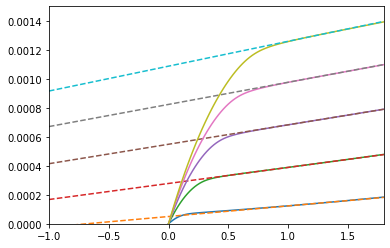

In [27]:
plt.ylim(bottom=0., top=0.0015)
plt.xlim(left=-1, right=1.8)
ve_list = []
for idx, data in enumerate(y_data):
    slope, intercept = get_tangent_saturation(x_data, data)
    Id = data
    Vds = x_data
    plt.plot(Vds, Id)
    ve_list.append((-intercept)/slope)
    abline(slope, intercept)
ve_avg = 0
for ve in ve_list:
    ve_avg += ve
ve_avg = ve_avg / len(ve_list)
print('Average lambda: {}'.format(-1 * 1/ve_avg))
plt.savefig('lambda_tangents.svg')
plt.show()
